In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error",{mse})
print("R2 Score",{r2})

Mean Squared Error {2374.3339396183187}
R2 Score {0.5188113124539249}


In [12]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",{RMSE})

Root Mean Squared Error {48.72713760953252}


In [13]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [14]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [16]:
y_pred1 = R.predict(X_test)

In [17]:
r2 = r2_score(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
print("Mean Squared Error",{mse})
print("R2 Score",{r2})

Mean Squared Error {2373.534822587257}
R2 Score {0.518973263588496}


In [18]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error",{RMSE})

Root Mean Squared Error {48.7189370018195}


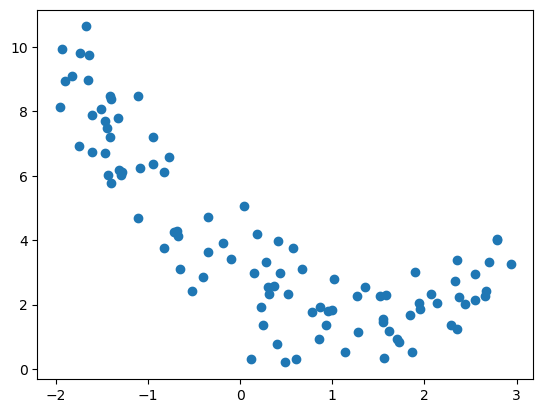

In [19]:
m = 100
x1 = 5 * np.random.rand(m, 1)-2
x2 = 0.7 * x1**2 - 2 * x1 +3 + np.random.randn(m,1)
plt.scatter(x1, x2)
plt.show()

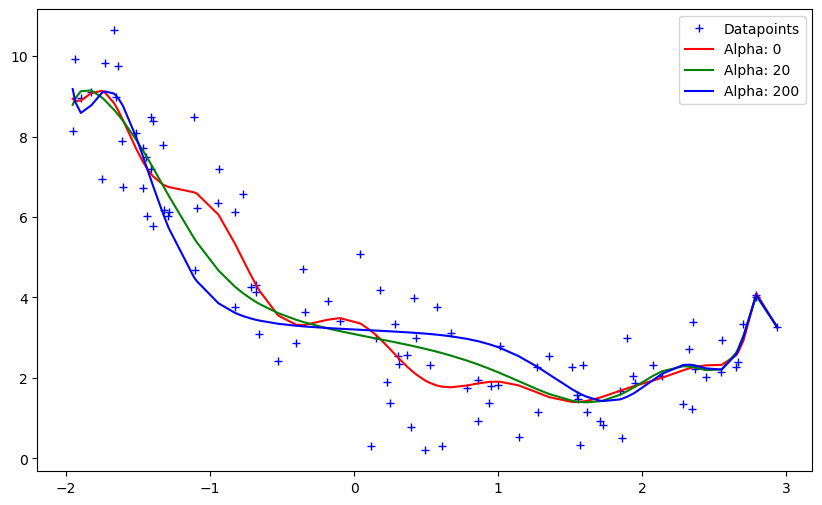

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([("poly_feats", PolynomialFeatures(degree=16)),("ridge", Ridge(alpha=alpha))])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ["r", "g", "b"]
plt.figure(figsize=(10,6))
plt.plot(x1, x2, "b+", label="Datapoints")

for alpha, c in zip(alphas,cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label="Alpha: {}".format(alpha))
    
plt.legend()
plt.show()

In [ ]:
#Red line is trying to do overfitting
#Green is making balancing approach
#Blue is trying to do underfitting